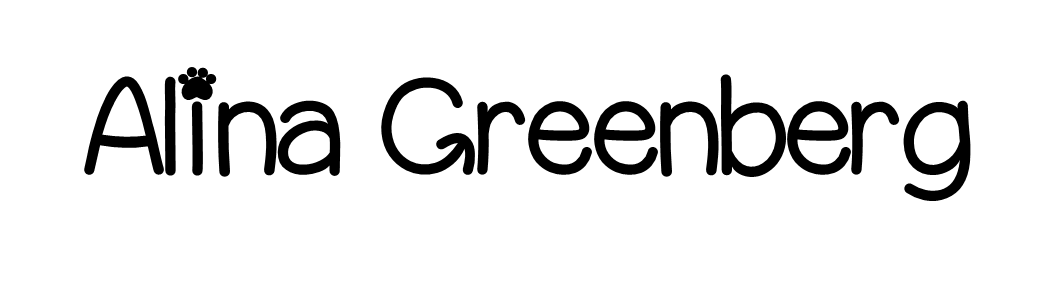

<br>
<br>
<hr class="dashed">
<br>
<br>

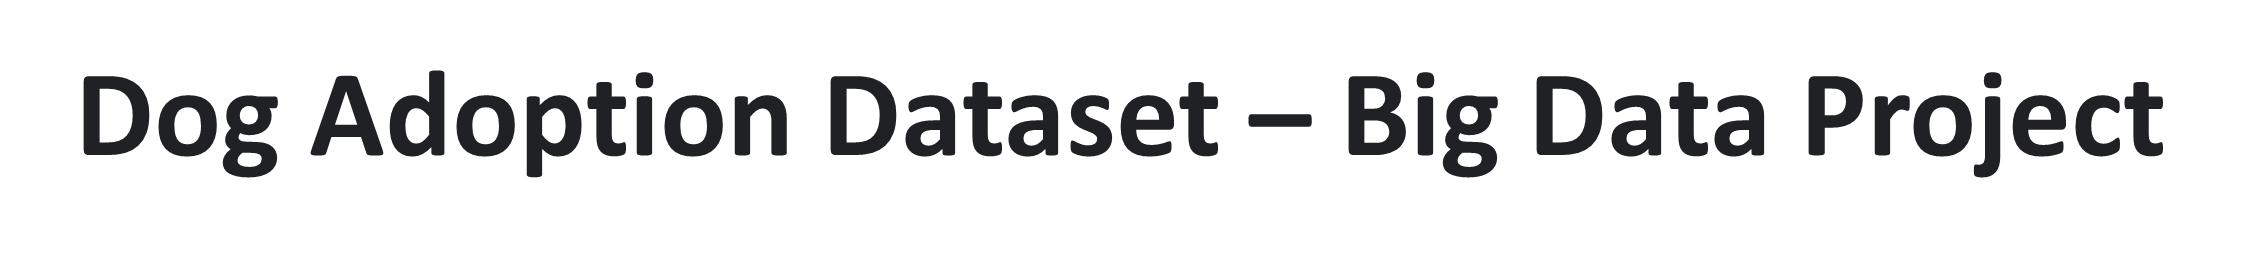

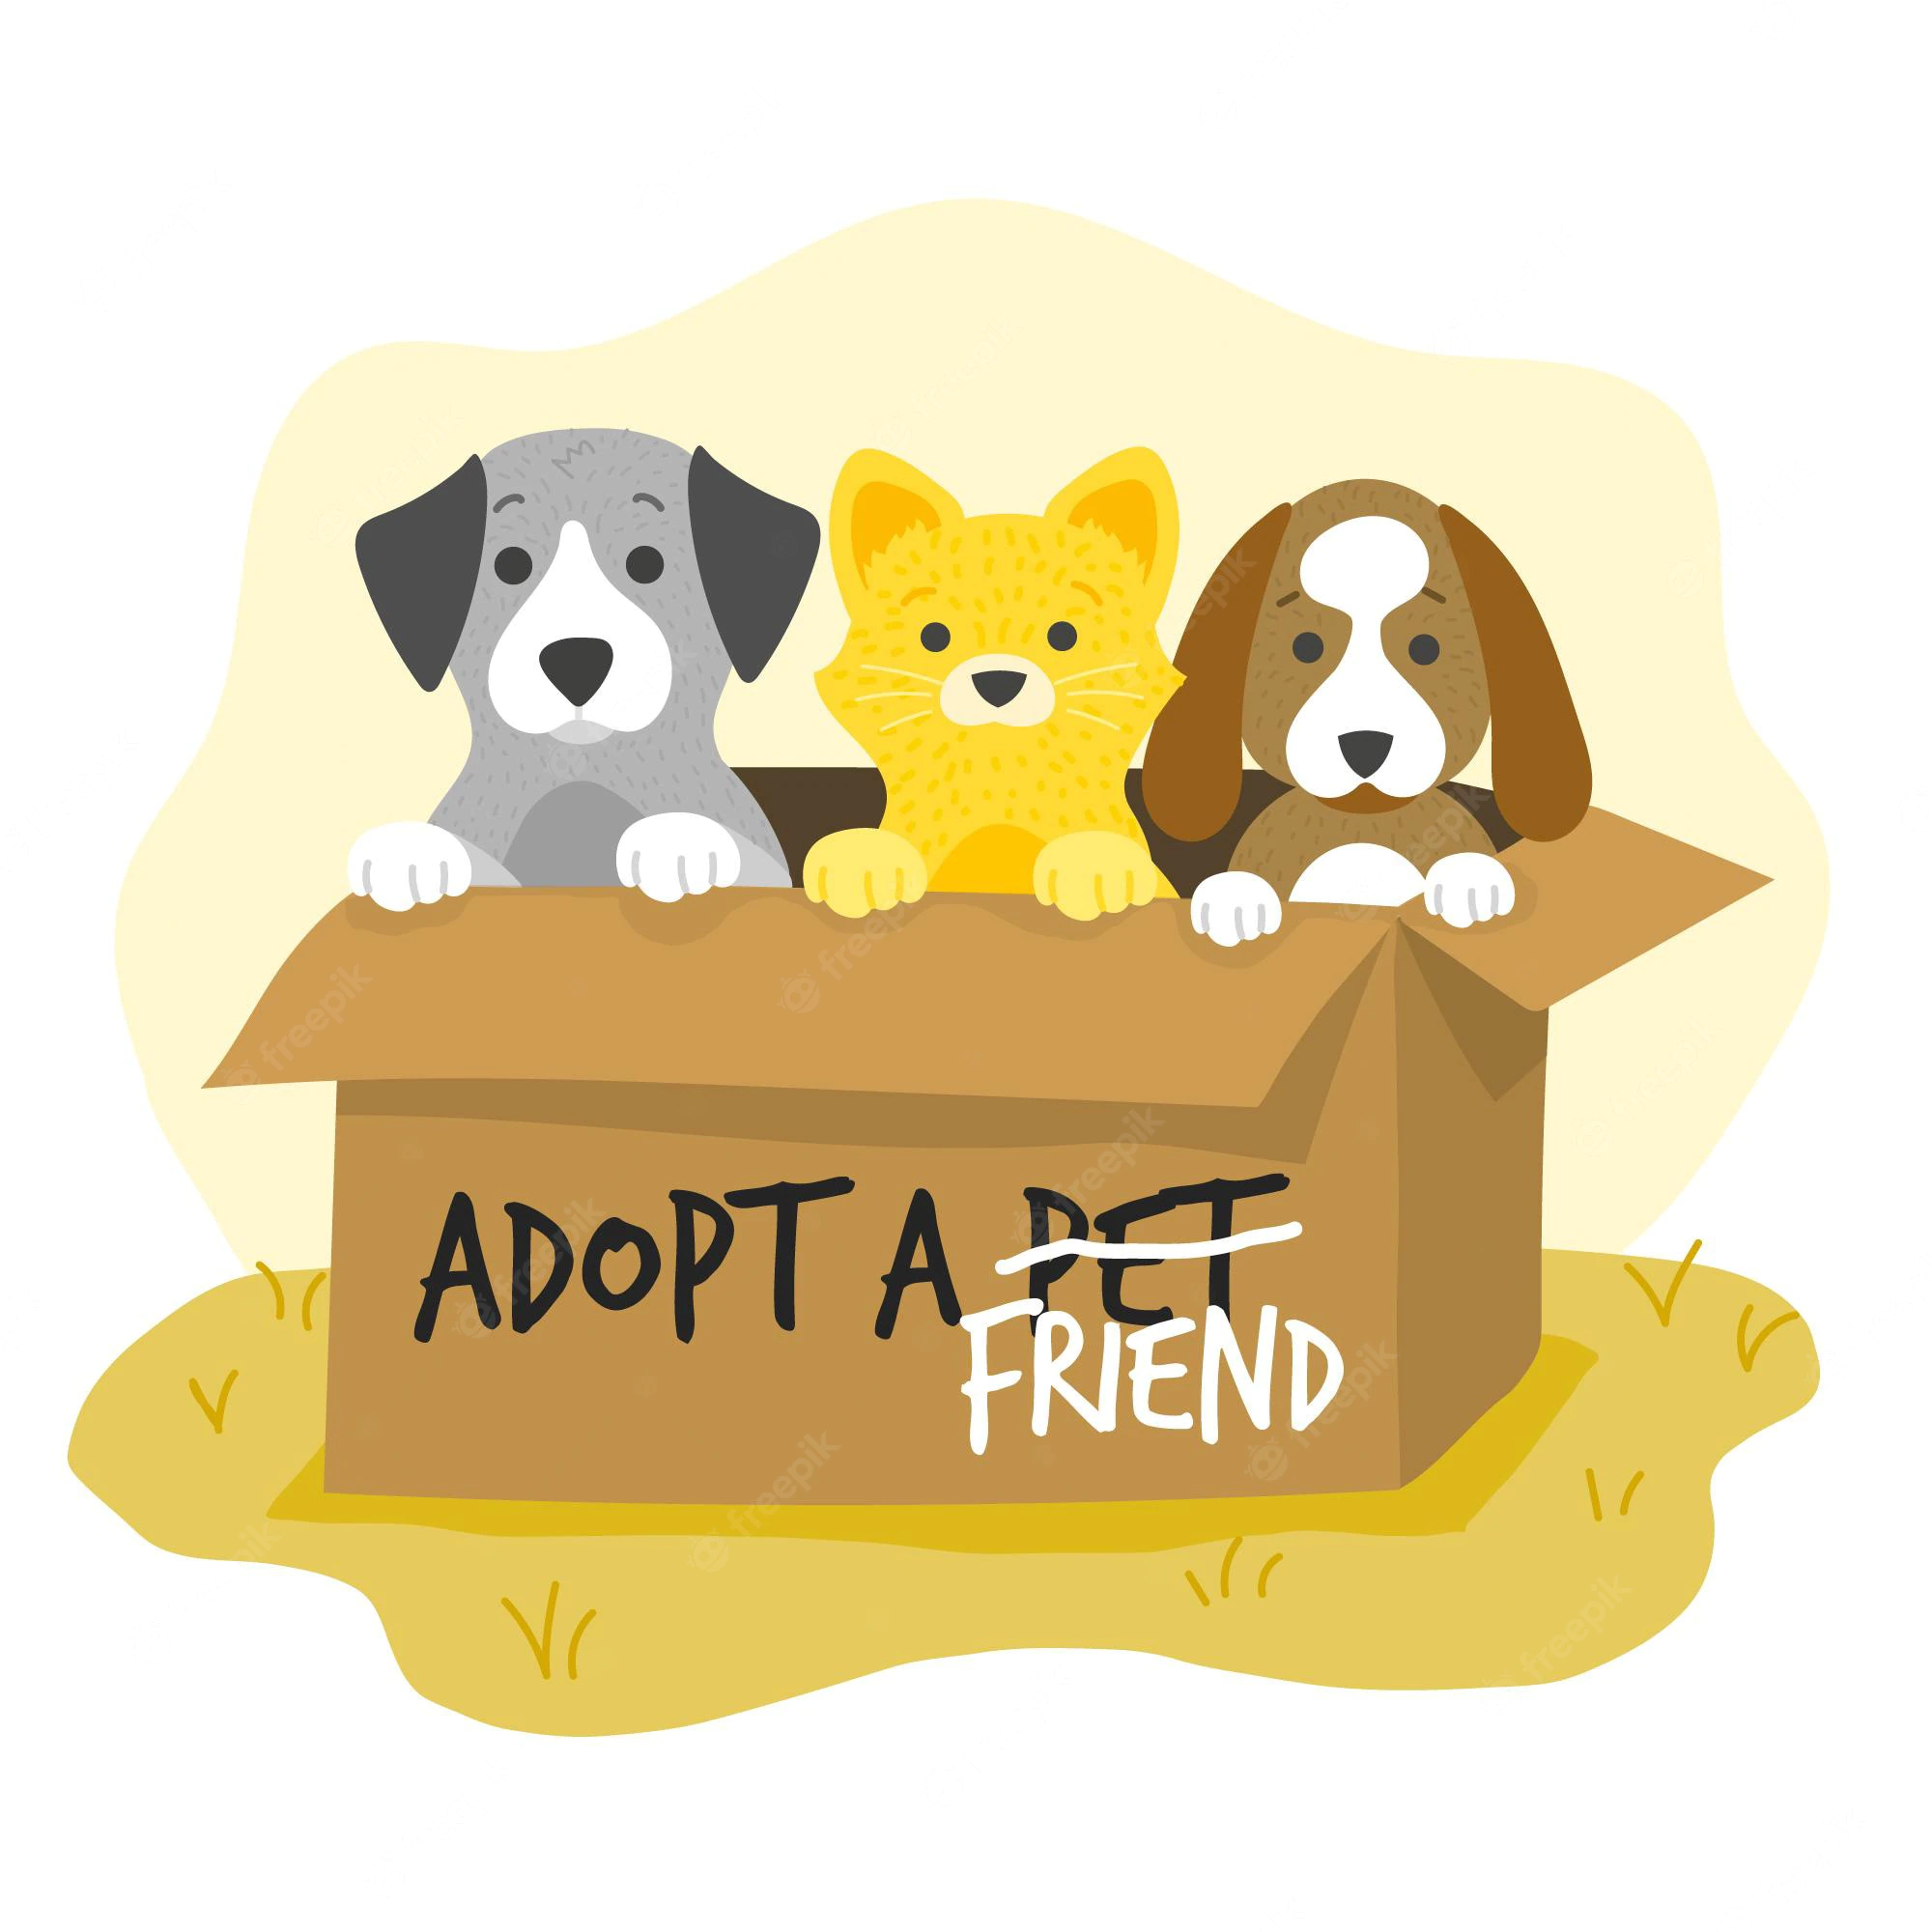

# **Link to dataset files:**
https://www.kaggle.com/datasets/whenamancodes/dog-adoption?resource=download

<h1><center>***</center></h1>

# **Background:** 
This dataset contains information on over 3,000 adoptable dogs across the United States. <br>

The data includes information on the origin of each dog, as well as the state they are currently listed for adoption and how different states rely on imported dogs for adoption.<br>
<br>
By understanding patterns of dog movement and relocation, we can help these animals find their forever homes.

<br>
<br>
<hr class="dashed">
<br>
<br>

###**First, install the enviorment**

In [1]:
# 1) Install Java, Spark and and run a local Spark session by just running this on Google Colab:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz   
!pip install -q findspark 

# 2) Set the locations where Spark and Java are installed to let know Colab where to find it.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

# 3) Import spark libraries and use them
import findspark
findspark.init("spark-3.3.1-bin-hadoop3") 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql import Row
from pyspark.sql import functions

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://archive

<br>
<br>
<hr class="dashed">
<br>
<br>

###**Establishing connection between "Colab" to "Google Drive"**

In [2]:
# Code for connecting our google drive to this collab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Check what files we have in the path
!ls "/content/drive/MyDrive/My Projects/Dog Adoption" 

 allDogDescriptions.csv   dogTravel.csv         new_dog_adoption_CSV_files
'Dog Adoption.ipynb'	  movesByLocation.csv


<br>
<br>
<hr class="dashed">
<br>
<br>

# **Creating a new folder with path:**

In [4]:
# Create new folder with a name "new_dog_adoption_CSV_files":
folderPath = '/content/drive/MyDrive/My Projects/Dog Adoption/new_dog_adoption_CSV_files'

**Before we convert the DataFrames into files, let's make sure our folder is empty.**

In [5]:
# Deleting any files in the "folderPath":
import os
import glob

filesInFolder = '/content/drive/MyDrive/My Projects/Dog Adoption/new_dog_adoption_CSV_files/*.*' # --> Deleting all file from "new_dog_adoption_CSV_files" folder in Google Drive.
fileList = glob.glob(filesInFolder)
print("Number of files BEFORE delete: ",len(fileList))

for x in fileList:
    try:
        os.remove(x)
    except:
        print("Error while deleting file : ", x)
fileList = glob.glob(filesInFolder)
print("Number of files AFTER delete: ",len(fileList))

Number of files BEFORE delete:  3
Number of files AFTER delete:  0


<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - All Dog Descriptions:**

In [6]:
# First we will read the file "allDogDescriptions.csv" into a spark DataFrame:
descriptions = spark.read.option("header","true").csv('/content/drive/MyDrive/My Projects/Dog Adoption/allDogDescriptions.csv', inferSchema = True)
descriptions.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------+--------------------+---------------+-----------+-------------+-----------------+--------------------+--------------+------+------+------+------+-----+-------------+--------+-------------+-------------+------------+--------+--------+-----------+---------+--------------------+------------+-------------+-----------+---------------+------+----------+------+--------------------+
|               index|                  id|              org_id|                 url|              type.x|species|       breed_primary|breed_secondary|breed_mixed|breed_unknown|    color_primary|     color_secondary|color_tertiary|   age|   sex|  size|  coat|fixed|house_trained|declawed|special_needs|shots_current|env_children|env_dogs|env_cats|       name|   status|              posted|contact_city|contact_state|contact_zip|contact_country|stateQ|  accessed|type.y|         description|
+---------------

In [7]:
# The shape of DataFrame:
print((descriptions.count(), len(descriptions.columns)))

(239027, 36)


In [8]:
descriptions.printSchema()

root
 |-- index: string (nullable = true)
 |-- id: string (nullable = true)
 |-- org_id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- type.x: string (nullable = true)
 |-- species: string (nullable = true)
 |-- breed_primary: string (nullable = true)
 |-- breed_secondary: string (nullable = true)
 |-- breed_mixed: string (nullable = true)
 |-- breed_unknown: string (nullable = true)
 |-- color_primary: string (nullable = true)
 |-- color_secondary: string (nullable = true)
 |-- color_tertiary: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- size: string (nullable = true)
 |-- coat: string (nullable = true)
 |-- fixed: string (nullable = true)
 |-- house_trained: string (nullable = true)
 |-- declawed: string (nullable = true)
 |-- special_needs: string (nullable = true)
 |-- shots_current: string (nullable = true)
 |-- env_children: string (nullable = true)
 |-- env_dogs: string (nullable = true)
 |-- env_cats: str

In [9]:
#Print out the first 3 Rows:
for row in descriptions.head(3):
    print(row)

Row(index='0', id='46042150', org_id='NV163', url='https://www.petfinder.com/dog/harley-46042150/nv/las-vegas/animal-network-nv163/?referrer_id=87b31e7d-4508-41d1-95ff-fdb59b9d4669', type.x='Dog', species='Dog', breed_primary='American Staffordshire Terrier', breed_secondary='Mixed Breed', breed_mixed='True', breed_unknown='False', color_primary='White / Cream', color_secondary='Yellow / Tan / Blond / Fawn', color_tertiary=None, age='Senior', sex='Male', size='Medium', coat='Short', fixed='True', house_trained='True', declawed=None, special_needs='False', shots_current='True', env_children=None, env_dogs=None, env_cats=None, name='HARLEY', status='adoptable', posted='2019-09-20T16:37:59+0000', contact_city='Las Vegas', contact_state='NV', contact_zip='89147', contact_country='US', stateQ='89009', accessed='2019-09-20', type.y='Dog', description='Harley is not sure how he wound up at shelter in his senior years but as you see from the pictures the shelter asked if we could find a real h


The columns of descriptions DataFrame:
<table>
<tr><th>id</th><td>The id of a dog. </td></tr>
<tr><th>org_id</th><td> The org id of a dog. </td></tr>
<tr><th>url</th><td> The URL of the animal's profile on PetFinder.</td></tr>
<tr><th>type.x</th><td> The type of animal. </td></tr>
<tr><th>species</th><td> The species of the animal. </td></tr>
<tr><th>breed_primary</th><td> The primary breed of the animal.</td></tr>
<tr><th>breed_secondary</th><td> The secondary breed of the animal. </td></tr>
<tr><th>breed_mixed</th><td> Whether the animal is a mixed breed. </td></tr>
<tr><th>breed_unknown</th><td> Whether the animal's breed is unknown.</td></tr>
<tr><th>color_primary</th><td> The primary color of the animal.</td></tr>
<tr><th>color_secondary</th><td> The secondary color of the animal.</td></tr>
<tr><th>color_tertiary</th><td> The tertiary color of the animal. </td></tr>
<tr><th>age</th><td> The age of the animal.</td></tr>
<tr><th>sex</th><td> The animal's sex.</td></tr>
<tr><th>size</th><td> The size of the animal. </td></tr>
<tr><th>coat</th><td> The type of coat the animal has.</td></tr>
<tr><th>fixed</th><td> Whether the animal is spayed or neutered. </td></tr>
<tr><th>house_trained</th><td> Whether the animal is house trained. </td></tr>
<tr><th>declawed</th><td> Whether the animal is declawed. </td></tr>
<tr><th>special_needs</th><td>Whether the animal has any special needs.</td></tr>
<tr><th>shots_current</th><td> Whether the animal is up to date on shots. </td>
<tr><th>env_children</th><td>Whether the animal is good with children.</td></tr>
<tr><th>env_dogs</th><td> Whether the animal is good with another dogs</td></tr>
<tr><th>env_cats</th><td> Whether the animal is good with cats.</td></tr>
<tr><th>name</th><td> The name of a dog. </td></tr>
<tr><th>status</th><td> What is the adoption status? </td></tr>
<tr><th>posted</th><td> When was the ad published? </td></tr>
<tr><th>contact_city</th><td> The city where the animal is located.</td></tr>
<tr><th>contact_state</th><td> The state where the animal is located.</td></tr>
<tr><th>contact_zip</th><td> The zip of location.</td></tr>
<tr><th>contact_country</th><td> The country where the animal is located.</td></tr>
<tr><th>type.y</th><td> The type of animal. </td></tr>
<tr><th>description</th><td> A description of the animal. </td></tr>
<table>

<h1><center>***</center></h1>

#**Data Cleaning**

### **Schema for the dataframes can also be defined explicitly while reading data:**

In [10]:
from pyspark.sql.types import (StructField, IntegerType, StringType, StructType, DateType, BooleanType)

data_schema_descriptions = [StructField('index', IntegerType(),True),
                       StructField('id', IntegerType(),True),
                       StructField('org_id', StringType(),True),
                       StructField('url', StringType(),True),
                       StructField('type_x', StringType(),True), 
                       StructField('species', StringType(), True),
                       StructField('breed_primary', StringType(), True),
                       StructField('breed_secondary', StringType(), True),
                       StructField('breed_mixed', BooleanType(), True),
                       StructField('breed_unknown', BooleanType(), True), 
                       StructField('color_primary', StringType(), True),
                       StructField('color_secondary', StringType(), True),
                       StructField('color_tertiary', StringType(), True),   
                       StructField('age', StringType(), True),
                       StructField('sex', StringType(), True),
                       StructField('size', StringType(), True),   
                       StructField('coat', StringType(), True), 
                       StructField('fixed', BooleanType(), True),
                       StructField('house_trained', BooleanType(), True),
                       StructField('declawed', StringType(), True),   
                       StructField('special_needs', BooleanType(), True),
                       StructField('shots_current', BooleanType(), True),
                       StructField('env_children', StringType(), True),   
                       StructField('env_dogs', StringType(), True),
                       StructField('env_cats', StringType(), True),
                       StructField('name', StringType(), True),  
                       StructField('status', StringType(), True), 
                       StructField('posted', DateType(), True),
                       StructField('contact_city', StringType(), True),
                       StructField('contact_state', StringType(), True),   
                       StructField('contact_zip', StringType(), True),
                       StructField('contact_country', StringType(), True),
                       StructField('stateQ', StringType(), True),   
                       StructField('accessed', StringType(), True),
                       StructField('type_y', StringType(), True),
                       StructField('description', StringType(), True)] 
                                
final_struct_descriptions = StructType(fields = data_schema_descriptions)

In [11]:
# We need to create a DataFrame where columns are separated:
descriptions = spark.read.option("delimiter",",").option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/My Projects/Dog Adoption/allDogDescriptions.csv', schema = final_struct_descriptions, inferSchema=True)
descriptions.show()

+-----+--------+--------------------+--------------------+--------------------+-------+--------------------+---------------+-----------+-------------+-----------------+--------------------+--------------+------+------+------+------+-----+-------------+--------+-------------+-------------+------------+--------+--------+-----------+---------+----------+------------+-------------+-----------+---------------+------+----------+------+--------------------+
|index|      id|              org_id|                 url|              type_x|species|       breed_primary|breed_secondary|breed_mixed|breed_unknown|    color_primary|     color_secondary|color_tertiary|   age|   sex|  size|  coat|fixed|house_trained|declawed|special_needs|shots_current|env_children|env_dogs|env_cats|       name|   status|    posted|contact_city|contact_state|contact_zip|contact_country|stateQ|  accessed|type_y|         description|
+-----+--------+--------------------+--------------------+--------------------+-------+---

In [12]:
# Some of the columns do not give us useful information, so they can be downloaded from Dataframe:
descriptions = descriptions.drop('org_id','description','shots_current','declawed','coat','stateQ','color_tertiary','breed_secondary','breed_unknown','color_secondary','accessed','contact_zip','contact_country','name')
descriptions.show()

+-----+--------+--------------------+--------------------+-------+--------------------+-----------+-----------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+----------+------------+-------------+------+
|index|      id|                 url|              type_x|species|       breed_primary|breed_mixed|    color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|    posted|contact_city|contact_state|type_y|
+-----+--------+--------------------+--------------------+-------+--------------------+-----------+-----------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+----------+------------+-------------+------+
|    0|46042150|https://www.petfi...|                 Dog|    Dog|American Stafford...|       true|    White / Cream|Senior|  Male|Medium| true|         true|        false|        null|    null|    null|adoptable|2019-09-20

<h1><center>***</center></h1>

###**Index Column:** 

In [13]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.index.isNull()).show()

+-----+----+--------------------+--------------------+-------+--------------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------+------------+-------------+------+
|index|  id|                 url|              type_x|species|       breed_primary|breed_mixed|color_primary| age| sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|posted|contact_city|contact_state|type_y|
+-----+----+--------------------+--------------------+-------+--------------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------+------------+-------------+------+
| null|null| we can be buddie...| I love to go on ...|   play| and spend time c...|       null|         null|null|null|null| null|         null|         null|        null|    null|    null|  null|  null|        null|         null|  null|
| null|null|                null|               

In [14]:
# We can see there is no important information in those rows, so e can drop them:
descriptions = descriptions.dropna(subset = ['index'])
descriptions.show()

+-----+--------+--------------------+------+-------+--------------------+-----------+-----------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+----------+------------+-------------+------+
|index|      id|                 url|type_x|species|       breed_primary|breed_mixed|    color_primary|   age|   sex|       size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|    posted|contact_city|contact_state|type_y|
+-----+--------+--------------------+------+-------+--------------------+-----------+-----------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+----------+------------+-------------+------+
|    0|46042150|https://www.petfi...|   Dog|    Dog|American Stafford...|       true|    White / Cream|Senior|  Male|     Medium| true|         true|        false|        null|    null|    null|adoptable|2019-09-20|   Las Vegas|           NV|   Dog|


In [15]:
descriptions.count()

58324

In [16]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('index').contains('index')|col('index').contains('NULL')|(col('index') == '' )|col('index').isNull()|isnan('index'),'index')).alias('NaN_index')).show()

+---------+
|NaN_index|
+---------+
|        0|
+---------+



###**ID Column:** 

In [17]:
# Create a list of IDs:
ID = descriptions.select('id').rdd.flatMap(lambda x: x).collect()

# See the first 20 ID:
ID[0:20]

[46042150,
 46042002,
 46040898,
 46039877,
 46039306,
 46039304,
 46039303,
 46039302,
 46039301,
 46038709,
 46038708,
 46038703,
 46038700,
 46038243,
 46038070,
 46038064,
 46038065,
 46038067,
 46038068,
 46038060]

In [18]:
# Now, we want to check how many valid IDs we have:
count = 0
Not_good = 0 
for i in ID:
  if len(str(i)) == 8:
      count = count + 1
  else:
       Not_good = Not_good + 1
print(len(ID))
print(count)
print(Not_good)

58324
58141
183


In [19]:
# Now, we design a program to accept 8 numbers from the dog's ID:
def is_Valid_ID(ID):
    # check for length
    if len(str(ID)) != 8:
        return -1
    else:
        return ID

In [20]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

remove_ID_not_good = udf(lambda x: is_Valid_ID(x))
descriptions = descriptions.withColumn("id",remove_ID_not_good(col("id"))).select('index','id','url','species','type_x','type_y','posted','breed_primary','breed_mixed','color_primary','age','sex','size','fixed','house_trained','special_needs',
'env_children', 'env_dogs', 'env_cats', 'status','contact_city', 'contact_state').distinct()
descriptions.show()

+-----+--------+--------------------+-------+------+------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|index|      id|                 url|species|type_x|type_y|    posted|      breed_primary|breed_mixed|       color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|     contact_city|contact_state|
+-----+--------+--------------------+-------+------+------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|  169|45944275|https://www.petfi...|    Dog|   Dog|   Dog|2019-09-11|           Shar-Pei|       true|Red / Chestnut / ...| Adult|Female| Large|false|        false|        false|        null|    null|    null|adoptable|    Bullhead City|       

In [21]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('id').contains('None')|col('id').contains('NULL')|(col('id') == '')|col('id').isNull()|isnan('id'),'id')).alias('NaN_id')).show()

+------+
|NaN_id|
+------+
|     0|
+------+



###**URL Column:** 

In [22]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('url').contains('None')|col('url').contains('NULL')|(col('url') == '')|col('url').isNull()|isnan('url'),'url')).alias('NaN_url')).show()

+-------+
|NaN_url|
+-------+
|     27|
+-------+



In [23]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.url.isNull()).show(27)

+-----+---+----+-------+------+------+------+-------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id| url|species|type_x|type_y|posted|breed_primary|breed_mixed|color_primary| age| sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+----+-------+------+------+------+-------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|  500| -1|null|   null|  null|  null|  null|         null|       null|         null|null|null|null| null|         null|         null|        null|    null|    null|  null|        null|         null|
|  200| -1|null|   null|  null|  null|  null|         null|       null|         null|null|null|null| null|         null|         null|        null|    null|    null|  null|        null|         null|


In [24]:
# We can see there is no important information in those rows, so we can drop them:
descriptions = descriptions.dropna(subset = ['url'])

In [25]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('url').contains('None')|col('url').contains('NULL')|(col('url') == '')|col('url').isNull()|isnan('url'),'url')).alias('NaN_url')).show()

+-------+
|NaN_url|
+-------+
|      0|
+-------+



In [26]:
# Let's check if there is any important information in the rows where the "https://" does not appear:
descriptions.filter(~col('url').contains('https://')).show()

+-----+---+-----+-------+--------------------+------+------+-------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|  url|species|              type_x|type_y|posted|breed_primary|breed_mixed|color_primary| age| sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+-----+-------+--------------------+------+------+-------------+-----------+-------------+----+----+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|   15| -1| Cats|   null| Kids unknownBelo...|  null|  null|         null|       null|         null|null|null|null| null|         null|         null|        null|    null|    null|  null|        null|         null|
+-----+---+-----+-------+--------------------+------+------+-------------+-----------+-------------+----+----+----+-----+-------------+-----

In [27]:
descriptions = descriptions.filter(~col('url').contains('Cats'))

###**Posted Column:** 

In [28]:
# Ceating list of 'Posted' with unique values:
Posted = descriptions.select('posted').distinct().collect()
Posted

[Row(posted=datetime.date(2019, 5, 8)),
 Row(posted=datetime.date(2018, 8, 10)),
 Row(posted=datetime.date(2019, 6, 4)),
 Row(posted=datetime.date(2014, 9, 26)),
 Row(posted=datetime.date(2018, 5, 28)),
 Row(posted=datetime.date(2017, 9, 11)),
 Row(posted=datetime.date(2016, 3, 1)),
 Row(posted=datetime.date(2014, 11, 12)),
 Row(posted=datetime.date(2013, 1, 22)),
 Row(posted=datetime.date(2017, 8, 11)),
 Row(posted=datetime.date(2018, 6, 6)),
 Row(posted=datetime.date(2018, 3, 17)),
 Row(posted=datetime.date(2010, 9, 24)),
 Row(posted=datetime.date(2004, 2, 23)),
 Row(posted=datetime.date(2016, 4, 25)),
 Row(posted=datetime.date(2011, 10, 7)),
 Row(posted=datetime.date(2017, 1, 6)),
 Row(posted=datetime.date(2011, 1, 29)),
 Row(posted=datetime.date(2018, 9, 1)),
 Row(posted=datetime.date(2018, 6, 26)),
 Row(posted=datetime.date(2016, 5, 3)),
 Row(posted=datetime.date(2016, 7, 26)),
 Row(posted=datetime.date(2018, 10, 5)),
 Row(posted=datetime.date(2016, 8, 15)),
 Row(posted=datetime.d

In [29]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.posted.isNull()).show()

+-----+--------+--------------------+-------+------+----------+------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+--------------------+--------------------+--------------------+
|index|      id|                 url|species|type_x|    type_y|posted|       breed_primary|breed_mixed|       color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|              status|        contact_city|       contact_state|
+-----+--------+--------------------+-------+------+----------+------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+--------------------+--------------------+--------------------+
|17619|45569380|https://www.petfi...|    Dog|   Dog|     20136|  null|             Maltese|      false|       White / Cream|Senior|Female| Small| true|         true|        false

In [30]:
descriptions = descriptions.withColumn("posted", when(col('posted').isNull(),'1900-01-01').otherwise(descriptions.posted).alias('posted'))

In [31]:
descriptions.filter(descriptions.posted.isNull()).show()

+-----+---+---+-------+------+------+------+-------------+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|species|type_x|type_y|posted|breed_primary|breed_mixed|color_primary|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+-------+------+------+------+-------------+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+-------+------+------+------+-------------+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



###**Type_x, Type_y and Species columns:** 

In [32]:
# Ceating list of 'Species' with unique values:
Species = descriptions.select('species').rdd.flatMap(lambda x: x).distinct().collect()
Species

['Dog']

In [33]:
# We can see there is no important information in those rows, so we can drop them:
descriptions = descriptions.drop('type_x').drop('type_y')
descriptions.show()

+-----+--------+--------------------+-------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|index|      id|                 url|species|    posted|      breed_primary|breed_mixed|       color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|     contact_city|contact_state|
+-----+--------+--------------------+-------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|  169|45944275|https://www.petfi...|    Dog|2019-09-11|           Shar-Pei|       true|Red / Chestnut / ...| Adult|Female| Large|false|        false|        false|        null|    null|    null|adoptable|    Bullhead City|           AZ|
|  310|45755148|https://www.petfi...|    Dog|201

In [34]:
# We know that this is only information for adopting a dog and therefore this column no longer provides useful information. It can be deleted at this point.
descriptions = descriptions.drop('species')

###**Breed Primary column:** 

In [35]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('breed_primary').contains('None')|col('breed_primary').contains('NULL')|(col('breed_primary') == '')|col('breed_primary').isNull()|isnan('breed_primary'),'breed_primary')).alias('NaN_breed_primary')).show()

+-----------------+
|NaN_breed_primary|
+-----------------+
|                0|
+-----------------+



In [36]:
# Ceating list of 'Species' with unique values:
Breed_Primary = descriptions.select('breed_primary').rdd.flatMap(lambda x: x).distinct().collect()
Breed_Primary

['Rat Terrier',
 'Pit Bull Terrier',
 'Labrador Retriever',
 'Chihuahua',
 'German Shepherd Dog',
 'Corgi',
 'Parson Russell Terrier',
 'Australian Shepherd',
 'Saint Bernard',
 'Cocker Spaniel',
 'Irish Wolfhound',
 'Boxer',
 'Black Labrador Retriever',
 'Hound',
 'Beagle',
 'Dachshund',
 'American Staffordshire Terrier',
 'Terrier',
 'Shih Tzu',
 'Pomeranian',
 'Finnish Spitz',
 'Great Dane',
 'Cane Corso',
 'Mastiff',
 'Redbone Coonhound',
 'Staffordshire Bull Terrier',
 'Maremma Sheepdog',
 'Greyhound',
 'Pug',
 'Doberman Pinscher',
 'Spaniel',
 'German Shorthaired Pointer',
 'Shiba Inu',
 'Belgian Shepherd / Malinois',
 'Plott Hound',
 'Beauceron',
 'Chow Chow',
 'Toy Fox Terrier',
 'Papillon',
 'English Springer Spaniel',
 'Mountain Cur',
 'Bluetick Coonhound',
 'Dutch Shepherd',
 'Norwegian Elkhound',
 'Lhasa Apso',
 'Maltese',
 'Cairn Terrier',
 'Xoloitzcuintli / Mexican Hairless',
 'Pekingese',
 'Vizsla',
 'Basset Hound',
 'English Foxhound',
 'Collie',
 'American Hairless Ter

In [37]:
  # Rename DataFrame columns name:
  descriptions = descriptions.withColumnRenamed('breed_primary', 'breed')
  descriptions.show()

+-----+--------+--------------------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|index|      id|                 url|    posted|              breed|breed_mixed|       color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|     contact_city|contact_state|
+-----+--------+--------------------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|  169|45944275|https://www.petfi...|2019-09-11|           Shar-Pei|       true|Red / Chestnut / ...| Adult|Female| Large|false|        false|        false|        null|    null|    null|adoptable|    Bullhead City|           AZ|
|  310|45755148|https://www.petfi...|2019-08-27|        Rat Terrier|       true|

###**Breed Mixed column:** 

In [38]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.breed_mixed.isNull()).show()

+-----+---+---+------+-----+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|posted|breed|breed_mixed|color_primary|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+------+-----+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+------+-----+-----------+-------------+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



In [39]:
# Ceating list of 'breed_mixed' with unique values:
breed_mixed = descriptions.select('breed_mixed').rdd.flatMap(lambda x: x).distinct().collect()
breed_mixed

[False, True]

###**Color Primary Column:** 

In [40]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('color_primary').contains('None')|col('color_primary').contains('NULL')|(col('color_primary') == '')|col('color_primary').isNull()|isnan('color_primary'),'color_primary')).alias('NaN_color_primary')).show()

+-----------------+
|NaN_color_primary|
+-----------------+
|            32046|
+-----------------+



In [41]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.color_primary.isNull()).show()

+-----+--------+--------------------+----------+--------------------+-----------+-------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+---------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|color_primary|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|   contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+-------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+---------------+-------------+
|  310|45755148|https://www.petfi...|2019-08-27|         Rat Terrier|       true|         null| Adult|Female| Small| true|         true|        false|        True|    True|    True|adoptable|      Henderson|           NV|
|  711|27521345|https://www.petfi...|2013-10-10|    Pit Bull Terrier|      false|         null| Young|  Male|Med

In [42]:
# Replace null values in "color_primary" column with the values 'unknown':
descriptions = descriptions.withColumn("color_primary", when(col('color_primary').contains('None')|col('color_primary').contains('NULL')|(col('color_primary') == '')|col('color_primary').isNull()|isnan('color_primary'),'unknown').otherwise(descriptions.color_primary).alias('color_primary')) 

In [43]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('color_primary').contains('None')|col('color_primary').contains('NULL')|(col('color_primary') == '')|col('color_primary').isNull()|isnan('color_primary'),'color_primary')).alias('NaN_color_primary')).show()

+-----------------+
|NaN_color_primary|
+-----------------+
|                0|
+-----------------+



In [44]:
# Rename DataFrame columns name:
descriptions = descriptions.withColumnRenamed('color_primary', 'color')
descriptions.show()

+-----+--------+--------------------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|index|      id|                 url|    posted|              breed|breed_mixed|               color|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|     contact_city|contact_state|
+-----+--------+--------------------+----------+-------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+-----------------+-------------+
|  169|45944275|https://www.petfi...|2019-09-11|           Shar-Pei|       true|Red / Chestnut / ...| Adult|Female| Large|false|        false|        false|        null|    null|    null|adoptable|    Bullhead City|           AZ|
|  310|45755148|https://www.petfi...|2019-08-27|        Rat Terrier|       true|

###**Age Column:** 

In [45]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('age').contains('None')|col('age').contains('NULL')|(col('age') == '')|col('age').isNull()|isnan('age'),'age')).alias('NaN_age')).show()

+-------+
|NaN_age|
+-------+
|      0|
+-------+



In [46]:
# Ceating list of 'age' with unique values:
age = descriptions.select('age').rdd.flatMap(lambda x: x).distinct().collect()
age

['Adult', 'Young', 'Baby', 'Senior']

###**Sex Column:** 

In [47]:
# Ceating list of 'sex' with unique values:
sex = descriptions.select('sex').rdd.flatMap(lambda x: x).distinct().collect()
sex

['Female', 'Male', 'Unknown']

In [48]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.sex.contains('Unknown')).show()

+-----+--------+--------------------+----------+-----------+-----------+-------+-----+-------+------+-----+-------------+-------------+------------+--------+--------+---------+------------+-------------+
|index|      id|                 url|    posted|      breed|breed_mixed|  color|  age|    sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|contact_city|contact_state|
+-----+--------+--------------------+----------+-----------+-----------+-------+-----+-------+------+-----+-------------+-------------+------------+--------+--------+---------+------------+-------------+
| 5780|      -1|https://www.petfi...|2004-02-23|     Beagle|       true|unknown|Adult|Unknown|Medium|false|        false|        false|        null|    null|    null|adoptable|     Phoenix|           AZ|
|34991|37010443|https://www.petfi...|2016-12-19|Mixed Breed|       true|unknown| Baby|Unknown| Small|false|        false|        false|        null|    null|    null|adoptable|     Ham

###**Size Column:** 

In [49]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('size').contains('size')|col('size').contains('NULL')|(col('size') == '')|col('size').isNull()|isnan('size'),'size')).alias('NaN_size')).show()

+--------+
|NaN_size|
+--------+
|       0|
+--------+



In [50]:
# Ceating list of 'size' with unique values:
size = descriptions.select('size').rdd.flatMap(lambda x: x).distinct().collect()
size

['Small', 'Medium', 'Extra Large', 'Large']

###**Fixed Column:** 

In [51]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.fixed.isNull()).show()

+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|posted|breed|breed_mixed|color|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



In [52]:
# Ceating list of 'fixed' with unique values:
fixed = descriptions.select('fixed').rdd.flatMap(lambda x: x).distinct().collect()
fixed

[False, True]

###**House Trained Column:** 

In [53]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.house_trained.isNull()).show()

+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|posted|breed|breed_mixed|color|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



In [54]:
# Ceating list of 'house_trained' with unique values:
house_trained = descriptions.select('house_trained').rdd.flatMap(lambda x: x).distinct().collect()
house_trained

[False, True]

###**Special Needs Column:** 

In [55]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.special_needs.isNull()).show()

+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|posted|breed|breed_mixed|color|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



In [56]:
# Ceating list of 'special_needs' with unique values:
special_needs = descriptions.select('special_needs').rdd.flatMap(lambda x: x).distinct().collect()
special_needs

[False, True]

###**Env Children Column:** 

In [57]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.env_children.isNull()).show()

+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+----------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|               color|   age|   sex|       size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|    contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+----------------+-------------+
|  169|45944275|https://www.petfi...|2019-09-11|            Shar-Pei|       true|Red / Chestnut / ...| Adult|Female|      Large|false|        false|        false|        null|    null|    null|adoptable|   Bullhead City|           AZ|
|  711|27521345|https://www.petfi...|2013-10-10|    Pit Bull

In [58]:
descriptions = descriptions.withColumn("env_children", when(col('env_children').isNull(),'Unknown').otherwise(descriptions.env_children).alias('env_children'))

In [59]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.env_children.isNull()).show()

+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index| id|url|posted|breed|breed_mixed|color|age|sex|size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
+-----+---+---+------+-----+-----------+-----+---+---+----+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+



In [60]:
# Ceating list of 'env_children' with unique values:
env_children = descriptions.select('env_children').rdd.flatMap(lambda x: x).distinct().collect()
env_children

['Unknown', 'True', 'False']

In [61]:
# Replace null values in "env_children" column with the values 'unknown':
descriptions = descriptions.withColumn("env_children", when(col('env_children').contains('None')|col('env_children').contains('NULL')|(col('env_children') == '')|col('env_children').isNull()|isnan('env_children'),'Unknown').otherwise(descriptions.env_children).alias('env_children')) 

In [62]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('env_children').contains('None')|col('env_children').contains('NULL')|(col('env_children') == '' )|col('env_children').isNull()|isnan('env_children'),'env_children')).alias('NaN_env_children')).show()

+----------------+
|NaN_env_children|
+----------------+
|               0|
+----------------+



###**Env Dogs Column:**

In [63]:
# Ceating list of 'env_dogs' with unique values:
env_dogs = descriptions.select('env_dogs').rdd.flatMap(lambda x: x).distinct().collect()
env_dogs

[None, 'True', 'False']

In [64]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('env_dogs').contains('None')|col('env_dogs').contains('NULL')|(col('env_dogs') == '' )|col('env_dogs').isNull()|isnan('env_dogs'),'env_dogs')).alias('NaN_env_dogs')).show()

+------------+
|NaN_env_dogs|
+------------+
|       23511|
+------------+



In [65]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.env_dogs.isNull()).show()

+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+----------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|               color|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|    contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+---------+----------------+-------------+
|  169|45944275|https://www.petfi...|2019-09-11|            Shar-Pei|       true|Red / Chestnut / ...| Adult|Female| Large|false|        false|        false|     Unknown|    null|    null|adoptable|   Bullhead City|           AZ|
|  711|27521345|https://www.petfi...|2013-10-10|    Pit Bull Terrier|      false

In [66]:
# Replace null values in "env_dogs" column with the values 'unknown':
descriptions = descriptions.withColumn("env_dogs", when(col('env_dogs').contains('None')|col('env_dogs').contains('NULL')|(col('env_dogs') == '')|col('env_dogs').isNull()|isnan('env_dogs'),'Unknown').otherwise(descriptions.env_children).alias('env_dogs')) 

In [67]:
# Ceating list of 'env_dogs' with unique values:
env_dogs = descriptions.select('env_dogs').rdd.flatMap(lambda x: x).distinct().collect()
env_dogs

['Unknown', 'True', 'False']

In [68]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('env_dogs').contains('None')|col('env_dogs').contains('NULL')|(col('env_dogs') == '' )|col('env_dogs').isNull()|isnan('env_dogs'),'env_dogs')).alias('NaN_env_dogs')).show()

+------------+
|NaN_env_dogs|
+------------+
|           0|
+------------+



###**Env Cats Column:**

In [69]:
# Ceating list of 'env_cats' with unique values:
env_cats = descriptions.select('env_cats').rdd.flatMap(lambda x: x).distinct().collect()
env_cats

[None, 'True', 'False']

In [70]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('env_cats').contains('None')|col('env_cats').contains('NULL')|(col('env_cats') == '' )|col('env_cats').isNull()|isnan('env_cats'),'env_cats')).alias('NaN_env_cats')).show()

+------------+
|NaN_env_cats|
+------------+
|       38828|
+------------+



In [71]:
# Replace null values in "env_cats" column with the values 'unknown':
descriptions = descriptions.withColumn("env_cats", when(col('env_cats').contains('None')|col('env_cats').contains('NULL')|(col('env_cats') == '')|col('env_cats').isNull()|isnan('env_cats'),'Unknown').otherwise(descriptions.env_cats).alias('env_cats')) 

In [72]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('env_cats').contains('None')|col('env_cats').contains('NULL')|(col('env_cats') == '' )|col('env_cats').isNull()|isnan('env_cats'),'env_cats')).alias('NaN_env_cats')).show()

+------------+
|NaN_env_cats|
+------------+
|           0|
+------------+



###**Status Column:**

In [73]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('status').contains('None')|col('status').contains('NULL')|(col('status') == '' )|col('status').isNull()|isnan('status'),'status')).alias('NaN_status')).show()

+----------+
|NaN_status|
+----------+
|         4|
+----------+



In [74]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.status.isNull()).show()

+-----+--------+--------------------+----------+-------------------+-----------+-------+-----+------+------+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|index|      id|                 url|    posted|              breed|breed_mixed|  color|  age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|status|contact_city|contact_state|
+-----+--------+--------------------+----------+-------------------+-----------+-------+-----+------+------+-----+-------------+-------------+------------+--------+--------+------+------------+-------------+
|46526|45935670|https://www.petfi...|1900-01-01| Labrador Retriever|       true|unknown|Adult|Female|Medium| true|        false|        false|     Unknown| Unknown| Unknown|  null|        null|         null|
|46528|45935617|https://www.petfi...|1900-01-01|              Akita|       true|unknown|Young|Female| Small| true|        false|        false|     Unknown| Unknown| Unk

In [75]:
# Replace null values in "status" column with the values 'unknown':
descriptions = descriptions.withColumn("status", when(col('status').contains('None')|col('status').contains('NULL')|(col('status') == '')|col('status').isNull()|isnan('status'),'Unknown').otherwise(descriptions.status).alias('status')) 

In [76]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('status').contains('None')|col('status').contains('NULL')|(col('status') == '')|col('status').isNull()|isnan('status'),'status')).alias('NaN_status')).show()

+----------+
|NaN_status|
+----------+
|         0|
+----------+



In [77]:
# Ceating list of 'status' with unique values:
status = descriptions.select('status').distinct().collect()
status

[Row(status='""You can fill out an adoption application online on our official website.'),
 Row(status='""&quot;Bertie&quot; came to us from the shelter.  He was found stray in the inner city.  He had some skin issues..."'),
 Row(status='""Meet Chloe our &quot;Little Rascal.&quot;'),
 Row(status='""Born in August 2014'),
 Row(status='""01.04.19'),
 Row(status='""Cooper is 13 years old'),
 Row(status='""This 10-year young senior is very sweet and loving. She weighs 9.5 lbs'),
 Row(status='""Hello I&#039;m Bianca'),
 Row(status='""Maddie is our little Miss Cutie Patootie! She is a short and stocky malamute girl with so much personality. She..."'),
 Row(status='""Gibson Edgar is a 12 month old male Lab mix that weighs 71.6 pounds.'),
 Row(status='Meet handsome 3 year old Gunther. Gunther came to us after being returned to the local shelter for putting his..."'),
 Row(status='""Hello i&#039;m MoMo or Elmo '),
 Row(status='""â€¢Basset Hound'),
 Row(status='adoptable'),
 Row(status='""This i

In [78]:
# Replace all values than are not 'adoptable' in "status" column with the values 'unknown':
descriptions = descriptions.withColumn("status", when(col('status') != 'adoptable','Unknown').otherwise(descriptions.status).alias('status')) 

In [79]:
# Ceating list of 'status' with unique values:
status_2 = descriptions.select('status').distinct().collect()
status_2

[Row(status='Unknown'), Row(status='adoptable')]

###**Contact City Column:**

In [80]:
# Ceating list of 'contact_city' with unique values:
contact_city_ = descriptions.select('contact_city').distinct().collect()
contact_city_

[Row(contact_city='Saint George'),
 Row(contact_city='Fairbanks'),
 Row(contact_city='Prattville'),
 Row(contact_city='Jemison'),
 Row(contact_city='Worcester'),
 Row(contact_city='Hanover'),
 Row(contact_city='Osteen'),
 Row(contact_city='Truckee'),
 Row(contact_city='Charleston'),
 Row(contact_city='Tempe'),
 Row(contact_city='Oakhurst'),
 Row(contact_city='Springfield'),
 Row(contact_city='Harrisburg'),
 Row(contact_city='Auburn'),
 Row(contact_city='Feura Bush'),
 Row(contact_city='Harrison'),
 Row(contact_city='Lawrenceville'),
 Row(contact_city='Phoenix'),
 Row(contact_city='Georgetown'),
 Row(contact_city='Plainfield'),
 Row(contact_city='Bayport'),
 Row(contact_city='Midland Park'),
 Row(contact_city='Randallstown'),
 Row(contact_city='Cherry Hill'),
 Row(contact_city='Estell Manor'),
 Row(contact_city='Kanab'),
 Row(contact_city='Granville'),
 Row(contact_city='Levittown'),
 Row(contact_city='East Rockaway'),
 Row(contact_city='Goochland'),
 Row(contact_city='Hollywood'),
 Row

In [81]:
! pip install geonamescache
import geonamescache
gc = geonamescache.GeonamesCache()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.4 MB 1.2 MB/s 


In [82]:
cities = gc.get_cities()
cities_new = list(cities.values())

list_of_cities = []
i = 0

for value in cities_new:
    list_of_cities.append(cities_new[i].get('name'))
    i = i + 1

list_of_cities[0:20]

['les Escaldes',
 'Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkān',
 'Dubai',
 'Dibba Al-Fujairah',
 'Dibba Al-Hisn',
 'Sharjah',
 'Ar Ruways',
 'Al Fujairah City',
 'Al Ain City',
 'Ajman City',
 'Adh Dhayd',
 'Abu Dhabi',
 'Khalifah A City',
 'Bani Yas City',
 'Musaffah',
 'Al Shamkhah City']

In [83]:
def cities(word):
    if word not in list_of_cities:
       return 'Unknown'
    else:
       return word   

In [84]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

us_cities = udf(lambda x: cities(x), StringType())
descriptions = descriptions.withColumn("contact_city",us_cities(col("contact_city"))).distinct()
descriptions.show()

+-----+--------+--------------------+----------+--------------------+-----------+--------------------+-----+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+--------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|               color|  age|   sex|       size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|  contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+--------------------+-----+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+--------------+-------------+
|27949|42828784|https://www.petfi...|2018-09-23|           Greyhound|       true|Gray / Blue / Silver|Young|  Male|     Medium| true|         true|        false|        True|    True| Unknown|adoptable|       Augusta|           GA|
|15145|34294906|https://www.petfi...|2016-01-21|    Pit Bull Terrier|   

In [85]:
# Ceating list of 'contact_city' with unique values:
contact_city_2 = descriptions.select('contact_city').distinct().collect()
contact_city_2

[Row(contact_city='Saint George'),
 Row(contact_city='Fairbanks'),
 Row(contact_city='Prattville'),
 Row(contact_city='Worcester'),
 Row(contact_city='Hanover'),
 Row(contact_city='Truckee'),
 Row(contact_city='Charleston'),
 Row(contact_city='Tempe'),
 Row(contact_city='Springfield'),
 Row(contact_city='Harrisburg'),
 Row(contact_city='Auburn'),
 Row(contact_city='Harrison'),
 Row(contact_city='Lawrenceville'),
 Row(contact_city='Phoenix'),
 Row(contact_city='Georgetown'),
 Row(contact_city='Plainfield'),
 Row(contact_city='Randallstown'),
 Row(contact_city='Cherry Hill'),
 Row(contact_city='Granville'),
 Row(contact_city='Levittown'),
 Row(contact_city='Hollywood'),
 Row(contact_city='Pleasantville'),
 Row(contact_city='Ocala'),
 Row(contact_city='Chamblee'),
 Row(contact_city='Griffin'),
 Row(contact_city='Monroe'),
 Row(contact_city='Waltham'),
 Row(contact_city='Brighton'),
 Row(contact_city='Brookfield'),
 Row(contact_city='Sterling'),
 Row(contact_city='Toms River'),
 Row(contac

###**Contact State Column:**

In [86]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('contact_state').contains('None')|col('contact_state').contains('NULL')|(col('contact_state') == '')|col('contact_state').isNull()|isnan('contact_state'),'contact_state')).alias('NaN_contact_state')).show()

+-----------------+
|NaN_contact_state|
+-----------------+
|               17|
+-----------------+



In [87]:
# Let's check if there is any important information in the rows where the value "null" appears:
descriptions.filter(descriptions.contact_state.isNull()).show()

+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+-------+------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|               color|   age|   sex|  size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats| status|contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+--------------------+------+------+------+-----+-------------+-------------+------------+--------+--------+-------+------------+-------------+
|46528|45935617|https://www.petfi...|1900-01-01|               Akita|       true|             unknown| Young|Female| Small| true|        false|        false|     Unknown| Unknown| Unknown|Unknown|     Unknown|         null|
|31888|41430442|https://www.petfi...|1900-01-01|               Hound|       true|       White / Cream| A

In [88]:
# Replace null values in "contact_state" column with the values 'unknown':
descriptions = descriptions.withColumn("contact_state", when(col('contact_state').contains('None')|col('contact_state').contains('NULL')|(col('contact_state') == '')|col('contact_state').isNull()|isnan('contact_state'),'Unknown').otherwise(descriptions.contact_state).alias('contact_state')) 

In [89]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

descriptions.select(count(when(col('contact_state').contains('None')|col('contact_state').contains('NULL')|(col('contact_state') == '' )|col('contact_state').isNull()|isnan('contact_state'),'contact_state')).alias('NaN_contact_state')).show()

+-----------------+
|NaN_contact_state|
+-----------------+
|                0|
+-----------------+



In [90]:
# Ceating list of 'contact_state' with unique values:
contact_state = descriptions.select('contact_state').distinct().collect()
contact_state

[Row(contact_state='AZ'),
 Row(contact_state='NJ'),
 Row(contact_state='DC'),
 Row(contact_state='2019-07-11T20:34:42+0000'),
 Row(contact_state='VA'),
 Row(contact_state='RI'),
 Row(contact_state='Albany'),
 Row(contact_state='NH'),
 Row(contact_state='NV'),
 Row(contact_state='ID'),
 Row(contact_state='CA'),
 Row(contact_state='CT'),
 Row(contact_state='VT'),
 Row(contact_state=' micro-chipped'),
 Row(contact_state='MD'),
 Row(contact_state='DE'),
 Row(contact_state='Unknown'),
 Row(contact_state='IL'),
 Row(contact_state='Gettysburg'),
 Row(contact_state='AL'),
 Row(contact_state='IN'),
 Row(contact_state='2019-07-11T14:16:38+0000'),
 Row(contact_state='IA'),
 Row(contact_state='PA'),
 Row(contact_state='NY'),
 Row(contact_state='WV'),
 Row(contact_state='GA'),
 Row(contact_state='MA'),
 Row(contact_state='CO'),
 Row(contact_state='FL'),
 Row(contact_state='AK'),
 Row(contact_state='AR'),
 Row(contact_state='UT'),
 Row(contact_state='HI'),
 Row(contact_state='SC'),
 Row(contact_stat

In [91]:
states = gc.get_us_states_by_names()
values = list(states.values())
list_of_us_states = []
i = 0

for value in values:
    list_of_us_states.append(values[i].get('code'))
    i = i + 1

In [92]:
list_of_us_states[0:20]

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA']

In [93]:
'NE' in list_of_us_states

True

In [94]:
def states(word):
    if word not in list_of_us_states:
       return 'Unknown'
    else:
       return word   

In [95]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

us_states = udf(lambda x: states(x), StringType())
descriptions = descriptions.withColumn("contact_state",us_states(col("contact_state"))).distinct()
descriptions.show()

+-----+--------+--------------------+----------+--------------------+-----------+--------------------+-----+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+--------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|               color|  age|   sex|       size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|  contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+--------------------+-----+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+--------------+-------------+
|27949|42828784|https://www.petfi...|2018-09-23|           Greyhound|       true|Gray / Blue / Silver|Young|  Male|     Medium| true|         true|        false|        True|    True| Unknown|adoptable|       Augusta|           GA|
|15145|34294906|https://www.petfi...|2016-01-21|    Pit Bull Terrier|   

In [96]:
# Ceating list of 'contact_state' with unique values:
contact_state_2 = descriptions.select('contact_state').distinct().collect()
contact_state_2

[Row(contact_state='AZ'),
 Row(contact_state='NJ'),
 Row(contact_state='DC'),
 Row(contact_state='VA'),
 Row(contact_state='RI'),
 Row(contact_state='NH'),
 Row(contact_state='NV'),
 Row(contact_state='ID'),
 Row(contact_state='CA'),
 Row(contact_state='CT'),
 Row(contact_state='VT'),
 Row(contact_state='MD'),
 Row(contact_state='DE'),
 Row(contact_state='Unknown'),
 Row(contact_state='IL'),
 Row(contact_state='AL'),
 Row(contact_state='IN'),
 Row(contact_state='IA'),
 Row(contact_state='PA'),
 Row(contact_state='NY'),
 Row(contact_state='WV'),
 Row(contact_state='GA'),
 Row(contact_state='MA'),
 Row(contact_state='CO'),
 Row(contact_state='FL'),
 Row(contact_state='AK'),
 Row(contact_state='AR'),
 Row(contact_state='UT'),
 Row(contact_state='HI'),
 Row(contact_state='SC'),
 Row(contact_state='LA'),
 Row(contact_state='MN'),
 Row(contact_state='OR'),
 Row(contact_state='KY'),
 Row(contact_state='WY'),
 Row(contact_state='MI'),
 Row(contact_state='WI'),
 Row(contact_state='NE'),
 Row(co

<h1><center>***</center></h1>

In [97]:
descriptions.createTempView('descriptions_rows')

In [98]:
descriptions_new = spark.sql('select distinct * from descriptions_rows order by index')

In [99]:
# The shape of DataFrame:
print((descriptions_new.count(), len(descriptions_new.columns)))

(58180, 19)


In [100]:
descriptions_new.printSchema()

root
 |-- index: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- posted: string (nullable = true)
 |-- breed: string (nullable = true)
 |-- breed_mixed: boolean (nullable = true)
 |-- color: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- size: string (nullable = true)
 |-- fixed: boolean (nullable = true)
 |-- house_trained: boolean (nullable = true)
 |-- special_needs: boolean (nullable = true)
 |-- env_children: string (nullable = true)
 |-- env_dogs: string (nullable = true)
 |-- env_cats: string (nullable = true)
 |-- status: string (nullable = true)
 |-- contact_city: string (nullable = true)
 |-- contact_state: string (nullable = true)



In [101]:
descriptions_new.show()

+-----+--------+--------------------+----------+--------------------+-----------+-----------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+------------+-------------+
|index|      id|                 url|    posted|               breed|breed_mixed|            color|   age|   sex|       size|fixed|house_trained|special_needs|env_children|env_dogs|env_cats|   status|contact_city|contact_state|
+-----+--------+--------------------+----------+--------------------+-----------+-----------------+------+------+-----------+-----+-------------+-------------+------------+--------+--------+---------+------------+-------------+
|    0|46042150|https://www.petfi...|2019-09-20|American Stafford...|       true|    White / Cream|Senior|  Male|     Medium| true|         true|        false|     Unknown| Unknown| Unknown|adoptable|   Las Vegas|           NV|
|    1|46042002|https://www.petfi...|2019-09-20|    Pit Bull Terrier|       true|Brown /

<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - Moves By Location:**

In [102]:
# First we will read the file "movesByLocation.csv" into a spark DataFrame:
moves = spark.read.option("header","true").csv('/content/drive/MyDrive/My Projects/Dog Adoption/movesByLocation.csv', inferSchema=True)
moves.show()

+-----+--------------+--------+--------+------+-----+
|index|      location|exported|imported| total| inUS|
+-----+--------------+--------+--------+------+-----+
|    0|         Texas|   635.0|    null| 566.0| true|
|    1|       Alabama|   268.0|     2.0|1428.0| true|
|    2|North Carolina|   158.0|    14.0|2627.0| true|
|    3|South Carolina|   139.0|    12.0|1618.0| true|
|    4|       Georgia|   137.0|    19.0|3479.0| true|
|    5|   Puerto Rico|   131.0|    null|  null|false|
|    6|    California|   130.0|     3.0|1664.0| true|
|    7|   South Korea|    76.0|    null|  null|false|
|    8|     Tennessee|    66.0|    20.0|1769.0| true|
|    9|      Kentucky|    57.0|     4.0|1123.0| true|
|   10|   Mississippi|    55.0|    null| 510.0| true|
|   11|        Mexico|    54.0|    null|  null|false|
|   12|     Louisiana|    53.0|    null| 912.0| true|
|   13| West Virginia|    50.0|    null| 565.0| true|
|   14|       Florida|    49.0|    32.0|2659.0| true|
|   15|      Arkansas|    47

In [103]:
# The shape of DataFrame:
print((moves.count(), len(moves.columns)))

(90, 6)


In [104]:
moves.printSchema()

root
 |-- index: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- exported: double (nullable = true)
 |-- imported: double (nullable = true)
 |-- total: double (nullable = true)
 |-- inUS: boolean (nullable = true)



In [105]:
#Print out the first 3 Rows:
for row in moves.head(3):
    print(row)

Row(index=0, location='Texas', exported=635.0, imported=None, total=566.0, inUS=True)
Row(index=1, location='Alabama', exported=268.0, imported=2.0, total=1428.0, inUS=True)
Row(index=2, location='North Carolina', exported=158.0, imported=14.0, total=2627.0, inUS=True)


The columns of moves DataFrame:
<table>
<tr><th>Location</th><td>The state where the dog is located. </td></tr>
<tr><th>Exported</th><td>The number of dogs exported from the state.</td></tr>
<tr><th>Imported</th><td>The number of dogs imported to the state.</td></tr>
<tr><th>Total	</th><td>The total number of dogs in the state.</td></tr>
<tr><th>InUS</th><td>Are the dogs in the US?</td></tr>
<table>

<h1><center>***</center></h1>

#**Data Cleaning**

### **Schema for the dataframes can also be defined explicitly while reading data:**

In [106]:
from pyspark.sql.types import (StructField, IntegerType,StringType, StructType, BooleanType,FloatType)

data_schema_moves = [StructField('index', IntegerType(),True),                     
                     StructField('location', StringType(),True),
                     StructField('exported', FloatType(), True),
                     StructField('imported', FloatType(), True),
                     StructField('total', FloatType(), True),
                     StructField('inUS', BooleanType(), True)]                                
final_struct_moves = StructType(fields = data_schema_moves)

In [107]:
# We need to create a DataFrame where columns are separated:
moves = spark.read.option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/My Projects/Dog Adoption/movesByLocation.csv', schema = final_struct_moves, inferSchema=True)
moves.show()

+-----+--------------+--------+--------+------+-----+
|index|      location|exported|imported| total| inUS|
+-----+--------------+--------+--------+------+-----+
|    0|         Texas|   635.0|    null| 566.0| true|
|    1|       Alabama|   268.0|     2.0|1428.0| true|
|    2|North Carolina|   158.0|    14.0|2627.0| true|
|    3|South Carolina|   139.0|    12.0|1618.0| true|
|    4|       Georgia|   137.0|    19.0|3479.0| true|
|    5|   Puerto Rico|   131.0|    null|  null|false|
|    6|    California|   130.0|     3.0|1664.0| true|
|    7|   South Korea|    76.0|    null|  null|false|
|    8|     Tennessee|    66.0|    20.0|1769.0| true|
|    9|      Kentucky|    57.0|     4.0|1123.0| true|
|   10|   Mississippi|    55.0|    null| 510.0| true|
|   11|        Mexico|    54.0|    null|  null|false|
|   12|     Louisiana|    53.0|    null| 912.0| true|
|   13| West Virginia|    50.0|    null| 565.0| true|
|   14|       Florida|    49.0|    32.0|2659.0| true|
|   15|      Arkansas|    47

In [108]:
moves.printSchema()

root
 |-- index: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- exported: float (nullable = true)
 |-- imported: float (nullable = true)
 |-- total: float (nullable = true)
 |-- inUS: boolean (nullable = true)



In [109]:
# The shape of DataFrame:
print((moves.count(), len(moves.columns)))

(90, 6)


<h1><center>***</center></h1>

###**Index Column:** 

In [110]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.index.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



###**Location Column:** 

In [111]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.location.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



In [112]:
# Ceating list of 'location' with unique values:
location = moves.select('location').distinct().collect()
location

[Row(location='Utah'),
 Row(location='Hawaii'),
 Row(location='Russia'),
 Row(location='Minnesota'),
 Row(location='Ohio'),
 Row(location='Turkey'),
 Row(location='Arkansas'),
 Row(location='Oregon'),
 Row(location='Afghanistan'),
 Row(location='Greece'),
 Row(location='Nevis'),
 Row(location='Texas'),
 Row(location='Taiwan'),
 Row(location='British Virgin Islands'),
 Row(location='Indianapolis'),
 Row(location='North Dakota'),
 Row(location='Pennsylvania'),
 Row(location='Connecticut'),
 Row(location='Qatar'),
 Row(location='Nebraska'),
 Row(location='Vermont'),
 Row(location='Finland'),
 Row(location='China'),
 Row(location='India'),
 Row(location='Bahamas'),
 Row(location='Kuwait'),
 Row(location='Nevada'),
 Row(location='Bosnia'),
 Row(location='St. Maarten'),
 Row(location='Puerto Rico'),
 Row(location='Washington'),
 Row(location='Illinois'),
 Row(location='Cayman Islands'),
 Row(location='Oklahoma'),
 Row(location='Spain'),
 Row(location='Delaware'),
 Row(location='Iran'),
 Row(

###**Location Column:** 

In [113]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.exported.isNull()).show()

+-----+-------------+--------+--------+-----+----+
|index|     location|exported|imported|total|inUS|
+-----+-------------+--------+--------+-----+----+
|   81| Rhode Island|    null|    87.0|607.0|true|
|   82|    Minnesota|    null|    67.0|958.0|true|
|   83|      Vermont|    null|    45.0|510.0|true|
|   84|New Hampshire|    null|    33.0|335.0|true|
|   85|     Delaware|    null|    29.0|296.0|true|
|   86|     Michigan|    null|    12.0|673.0|true|
|   87|Washington DC|    null|    11.0|336.0|true|
|   88|      Montana|    null|    null| 18.0|true|
|   89|       Alaska|    null|    null| 15.0|true|
+-----+-------------+--------+--------+-----+----+



In [114]:
moves = moves.withColumn("exported", when(col('exported').isNull(),-1.0).otherwise(moves.exported).alias('exported'))

In [115]:
moves.filter(moves.exported.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



###**Imported Column:** 

In [116]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.imported.isNull()).show()

+-----+-------------+--------+--------+-----+-----+
|index|     location|exported|imported|total| inUS|
+-----+-------------+--------+--------+-----+-----+
|    0|        Texas|   635.0|    null|566.0| true|
|    5|  Puerto Rico|   131.0|    null| null|false|
|    7|  South Korea|    76.0|    null| null|false|
|   10|  Mississippi|    55.0|    null|510.0| true|
|   11|       Mexico|    54.0|    null| null|false|
|   12|    Louisiana|    53.0|    null|912.0| true|
|   13|West Virginia|    50.0|    null|565.0| true|
|   16|        China|    28.0|    null| null|false|
|   17|   New Mexico|    27.0|    null|636.0| true|
|   18|     Thailand|    20.0|    null| null|false|
|   20|        India|    18.0|    null| null|false|
|   21|       Taiwan|    18.0|    null| null|false|
|   23|        Egypt|    15.0|    null| null|false|
|   25|      Bahamas|    13.0|    null| null|false|
|   31|        Spain|     8.0|    null| null|false|
|   32|        Haiti|     7.0|    null| null|false|
|   34|     

In [117]:
moves = moves.withColumn("imported", when(col('imported').isNull(),-1.0).otherwise(moves.imported).alias('imported'))

In [118]:
moves.filter(moves.imported.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



###**Total Column:** 

In [119]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.total.isNull()).show()

+-----+-----------+--------+--------+-----+-----+
|index|   location|exported|imported|total| inUS|
+-----+-----------+--------+--------+-----+-----+
|    5|Puerto Rico|   131.0|    -1.0| null|false|
|    7|South Korea|    76.0|    -1.0| null|false|
|   11|     Mexico|    54.0|    -1.0| null|false|
|   16|      China|    28.0|    -1.0| null|false|
|   18|   Thailand|    20.0|    -1.0| null|false|
|   20|      India|    18.0|    -1.0| null|false|
|   21|     Taiwan|    18.0|    -1.0| null|false|
|   23|      Egypt|    15.0|    -1.0| null|false|
|   25|    Bahamas|    13.0|    -1.0| null|false|
|   31|      Spain|     8.0|    -1.0| null|false|
|   32|      Haiti|     7.0|    -1.0| null|false|
|   34|       Oman|     7.0|    -1.0| null|false|
|   36|     Kuwait|     5.0|    -1.0| null|false|
|   39|      Qatar|     4.0|    -1.0| null|false|
|   42| Costa Rica|     3.0|    -1.0| null|false|
|   43|     Greece|     3.0|    -1.0| null|false|
|   46|     Russia|     3.0|    -1.0| null|false|


In [120]:
moves = moves.withColumn("total", when(col('total').isNull(),-1.0).otherwise(moves.total).alias('total'))

In [121]:
moves.filter(moves.total.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



###**InUS Column:** 

In [122]:
# Let's check if there is any important information in the rows where the value "null" appears:
moves.filter(moves.inUS.isNull()).show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
+-----+--------+--------+--------+-----+----+



In [123]:
# Ceating list of 'inUS' with unique values:
inUS = moves.select('inUS').distinct().collect()
inUS

[Row(inUS=True), Row(inUS=False)]

<h1><center>***</center></h1>

In [124]:
moves.createTempView('moves_rows')

In [125]:
moves_new = spark.sql('select distinct * from moves_rows order by index')

In [126]:
# The shape of DataFrame:
print((moves_new.count(), len(moves_new.columns)))

(90, 6)


In [127]:
moves_new.printSchema()

root
 |-- index: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- exported: double (nullable = true)
 |-- imported: double (nullable = true)
 |-- total: double (nullable = true)
 |-- inUS: boolean (nullable = true)



In [128]:
moves_new.show()

+-----+--------------+--------+--------+------+-----+
|index|      location|exported|imported| total| inUS|
+-----+--------------+--------+--------+------+-----+
|    0|         Texas|   635.0|    -1.0| 566.0| true|
|    1|       Alabama|   268.0|     2.0|1428.0| true|
|    2|North Carolina|   158.0|    14.0|2627.0| true|
|    3|South Carolina|   139.0|    12.0|1618.0| true|
|    4|       Georgia|   137.0|    19.0|3479.0| true|
|    5|   Puerto Rico|   131.0|    -1.0|  -1.0|false|
|    6|    California|   130.0|     3.0|1664.0| true|
|    7|   South Korea|    76.0|    -1.0|  -1.0|false|
|    8|     Tennessee|    66.0|    20.0|1769.0| true|
|    9|      Kentucky|    57.0|     4.0|1123.0| true|
|   10|   Mississippi|    55.0|    -1.0| 510.0| true|
|   11|        Mexico|    54.0|    -1.0|  -1.0|false|
|   12|     Louisiana|    53.0|    -1.0| 912.0| true|
|   13| West Virginia|    50.0|    -1.0| 565.0| true|
|   14|       Florida|    49.0|    32.0|2659.0| true|
|   15|      Arkansas|    47

<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - Dog Travel:**

In [129]:
# First we will read the file "dogTravel" into a spark DataFrame:
travel = spark.read.option("header","true").csv('/content/drive/MyDrive/My Projects/Dog Adoption/dogTravel.csv', inferSchema=True)
travel.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               index|                  id|        contact_city|       contact_state|         description|               found|              manual|              remove|         still_there|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                   0|            44520267|               Anoka|                  MN|Boris is a handso...|                null|                null|                null|                null|
|   He is 4 years old| just under 10 po...| and is a special...| and needs prescr...|                null|                null|                null|                null|                null|
|If interested in ...|                null|  

In [130]:
# The shape of DataFrame:
print((travel.count(), len(travel.columns)))

(58280, 9)


In [131]:
travel.printSchema()

root
 |-- index: string (nullable = true)
 |-- id: string (nullable = true)
 |-- contact_city: string (nullable = true)
 |-- contact_state: string (nullable = true)
 |-- description: string (nullable = true)
 |-- found: string (nullable = true)
 |-- manual: string (nullable = true)
 |-- remove: string (nullable = true)
 |-- still_there: string (nullable = true)



In [132]:
#Print out the first 3 Rows:
for row in travel.head(3):
    print(row)

Row(index='0', id='44520267', contact_city='Anoka', contact_state='MN', description="Boris is a handsome mini schnauzer who made his long trek up her from Arkansas on 4/2019. He loves rope toys and running around his foster mom's yard. ", found=None, manual=None, remove=None, still_there=None)
Row(index='He is 4 years old', id=' just under 10 pounds', contact_city=' and is a special needs dog. He needs vitamin B-12 shots every other week (may change)', contact_state=' and needs prescription dog food with no meet or protein. Boris is on a vegan diet.', description=None, found=None, manual=None, remove=None, still_there=None)
Row(index='If interested in Boris please fill out or adoption application so we can set up a meet and greet for you! His foster mom can explain more in-depth about his needs and can answer any questions you may have about his lifestyle.', id=None, contact_city=None, contact_state=None, description=None, found=None, manual=None, remove=None, still_there=None)


The columns of travel DataFrame:
<table>
<tr><th>Contact_city</th><td>The city where the animal is located.</td></tr>
<tr><th>Contact_state</th><td>The state where the animal is located.</td></tr>
<tr><th>Description</th><td>A description of the animal.</td></tr>
<tr><th>Found</th><td>What country was the animal found in?</td></tr>
<tr><th>Manual</th><td>A manual override for the animal's location.</td></tr>
<tr><th>Remove</th><td>	Whether the animal was removed or not.</td></tr>
<tr><th>Still_There</th><td>Whether or not the animal is still available for adoption.</td></tr>
<table>

<h1><center>***</center></h1>

#**Data Cleaning**

### **Schema for the dataframes can also be defined explicitly while reading data:**

In [133]:
from pyspark.sql.types import (StructField, IntegerType, StringType, StructType, BooleanType, FloatType, DateType)

data_schema_travel = [StructField('index', IntegerType(),True),
                     StructField('id', IntegerType(),True),                     
                     StructField('contact_city', StringType(),True),
                     StructField('contact_state', StringType(), True),
                     StructField('description', StringType(), True),
                     StructField('found', StringType(), True),
                     StructField('manual', StringType(), True),
                     StructField('remove', StringType(), True),
                     StructField('still_there', StringType(), True)]                                
final_struct_travel = StructType(fields = data_schema_travel)

In [134]:
# We need to create a DataFrame where columns are separated:
travel = spark.read.option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/My Projects/Dog Adoption/dogTravel.csv', schema = final_struct_travel, inferSchema=True)
travel.show()

+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|      id|        contact_city|       contact_state|         description|               found|              manual|              remove|         still_there|
+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|44520267|               Anoka|                  MN|Boris is a handso...|                null|                null|                null|                null|
| null|    null| and is a special...| and needs prescr...|                null|                null|                null|                null|                null|
| null|    null|                null|                null|                null|                null|                null|                null|                null|
| null|    null|

In [135]:
# Some of the columns do not give us useful information, so they can be downloaded from Dataframe:
travel = travel.drop('description', 'manual')
travel.show()

+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|      id|        contact_city|       contact_state|               found|              remove|         still_there|
+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|44520267|               Anoka|                  MN|                null|                null|                null|
| null|    null| and is a special...| and needs prescr...|                null|                null|                null|
| null|    null|                null|                null|                null|                null|                null|
| null|    null|                null|                null|                null|                null|                null|
|    1|44698509|           Groveland|                  FL| is crate trained...|                null|                null|
| null|    null|        

<h1><center>***</center></h1>

###**Index Column:** 

In [136]:
# Let's check if there is any important information in the rows where the value "null" appears:
travel.filter(travel.index.isNull()).show()

+-----+----+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|  id|        contact_city|       contact_state|               found|              remove|         still_there|
+-----+----+--------------------+--------------------+--------------------+--------------------+--------------------+
| null|null| and is a special...| and needs prescr...|                null|                null|                null|
| null|null|                null|                null|                null|                null|                null|
| null|null|                null|                null|                null|                null|                null|
| null|null|         is neutered|  heartworm negative| is microchipped ...|                null|                null|
| null|null|             Bahamas|                null|                null|                null|                null|
| null|null| purebred red hee...| about 37 pounds ...| Z

In [137]:
# We can see there is no important information in those rows, so e can drop them:
travel = travel.dropna(subset = ['index'])
travel.show()

+-----+--------+------------+-------------+--------------------+------+-----------+
|index|      id|contact_city|contact_state|               found|remove|still_there|
+-----+--------+------------+-------------+--------------------+------+-----------+
|    0|44520267|       Anoka|           MN|                null|  null|       null|
|    1|44698509|   Groveland|           FL| is crate trained...|  null|       null|
|    2|45983838|   Adamstown|           MD|                null|  null|       null|
|    3|44475904| Saint Cloud|           MN|             Adaptil|  True|       null|
|    4|43877389|      Pueblo|           CO|         Afghanistan|  null|       null|
|    5|43082511|  Manchester|           CT|                null|  null|       null|
|    6|45287347|     Wooster|           OH|                null|  null|       null|
|    7|45287347|     Wooster|           OH|                null|  null|       null|
|    8|45987719| Locust Fork|           AL|                null|  null|     

In [138]:
travel.count()

6281

In [139]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('index').contains('index')|col('index').contains('NULL')|(col('index') == '')|col('index').isNull()|isnan('index'),'index')).alias('NaN_index')).show()

+---------+
|NaN_index|
+---------+
|        0|
+---------+



###**ID Column:** 

In [140]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('id').contains('id')|col('id').contains('NULL')|(col('id') == '')|col('id').isNull()|isnan('id'),'id')).alias('NaN_id')).show()

+------+
|NaN_id|
+------+
|    87|
+------+



In [141]:
# Let's check if there is any important information in the rows where the value "null" appears:
travel.filter(travel.id.isNull()).show(87)

+-----+----+------------+-------------+-----+------+-----------+
|index|  id|contact_city|contact_state|found|remove|still_there|
+-----+----+------------+-------------+-----+------+-----------+
| 1050|null|        null|         null| null|  null|       null|
|    9|null|        null|         null| null|  null|       null|
|    9|null|        null|         null| null|  null|       null|
|  795|null|        null|         null| null|  null|       null|
|  850|null|        null|         null| null|  null|       null|
|  795|null|        null|         null| null|  null|       null|
|  850|null|        null|         null| null|  null|       null|
|  895|null|        null|         null| null|  null|       null|
|  750|null|        null|         null| null|  null|       null|
|  795|null|        null|         null| null|  null|       null|
|  550|null|        null|         null| null|  null|       null|
|  400|null|        null|         null| null|  null|       null|
| 1050|null|        null|

In [142]:
# We can see there is no important information in those rows, so e can drop them:
travel = travel.dropna(subset = ['id'])
travel.show()

+-----+--------+------------+-------------+--------------------+------+-----------+
|index|      id|contact_city|contact_state|               found|remove|still_there|
+-----+--------+------------+-------------+--------------------+------+-----------+
|    0|44520267|       Anoka|           MN|                null|  null|       null|
|    1|44698509|   Groveland|           FL| is crate trained...|  null|       null|
|    2|45983838|   Adamstown|           MD|                null|  null|       null|
|    3|44475904| Saint Cloud|           MN|             Adaptil|  True|       null|
|    4|43877389|      Pueblo|           CO|         Afghanistan|  null|       null|
|    5|43082511|  Manchester|           CT|                null|  null|       null|
|    6|45287347|     Wooster|           OH|                null|  null|       null|
|    7|45287347|     Wooster|           OH|                null|  null|       null|
|    8|45987719| Locust Fork|           AL|                null|  null|     

In [143]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('id').contains('id')|col('id').contains('NULL')|(col('id') == '')|col('id').isNull()|isnan('id'),'id')).alias('NaN_id')).show()

+------+
|NaN_id|
+------+
|     0|
+------+



###**Contact City Column:** 

In [144]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('contact_city').contains('contact_city')|col('contact_city').contains('NULL')|(col('contact_city') == '')|col('contact_city').isNull()|isnan('contact_city'),'contact_city')).alias('NaN_contact_city')).show()

+----------------+
|NaN_contact_city|
+----------------+
|               0|
+----------------+



In [145]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

us_cities = udf(lambda x: cities(x), StringType())
travel = travel.withColumn("contact_city",us_cities(col("contact_city"))).distinct()
travel.show()

+-----+--------+--------------+-------------+--------------------+--------------------+--------------------+
|index|      id|  contact_city|contact_state|               found|              remove|         still_there|
+-----+--------+--------------+-------------+--------------------+--------------------+--------------------+
|   86|39777150|Cliffside Park|           NJ|             Alabama|                null|                null|
|  360|44649686|   Albuquerque|           NM|          4 year old|                calm| KIND-HEARTED sou...|
|  420|45830496|        Boston|           MA|                null|                null|                null|
|  765|45986243|     Charlotte|           NC|                null|                null|                null|
|  919|45563892|     Littleton|           CO|       and she would| love a home with...|                null|
| 1319|45632458|Fredericksburg|           VA|                null|                null|                null|
| 1373|45988216|   

###**Contact State Column:** 

In [146]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('contact_state').contains('contact_state')|col('contact_state').contains('NULL')|(col('contact_state') == '')|col('contact_state').isNull()|isnan('contact_state'),'contact_state')).alias('contact_state')).show()

+-------------+
|contact_state|
+-------------+
|            0|
+-------------+



In [147]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

us_states = udf(lambda x: states(x), StringType())
travel = travel.withColumn("contact_state",us_states(col("contact_state"))).distinct()
travel.show()

+-----+--------+--------------+-------------+--------------------+--------------------+--------------------+
|index|      id|  contact_city|contact_state|               found|              remove|         still_there|
+-----+--------+--------------+-------------+--------------------+--------------------+--------------------+
|   86|39777150|Cliffside Park|           NJ|             Alabama|                null|                null|
|  360|44649686|   Albuquerque|           NM|          4 year old|                calm| KIND-HEARTED sou...|
|  420|45830496|        Boston|           MA|                null|                null|                null|
|  765|45986243|     Charlotte|           NC|                null|                null|                null|
|  919|45563892|     Littleton|           CO|       and she would| love a home with...|                null|
| 1319|45632458|Fredericksburg|           VA|                null|                null|                null|
| 1373|45988216|   

###**Found Column:** 

In [148]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('found').contains('found')|col('found').contains('NULL')|(col('found') == '' )|col('found').isNull(),'found')).alias('NaN_found')).show()

+---------+
|NaN_found|
+---------+
|     4859|
+---------+



In [149]:
# Let's check if there is any important information in the rows where the value "null" appears:
travel.filter(travel.found.isNull()).show()

+-----+--------+--------------+-------------+-----+------+-----------+
|index|      id|  contact_city|contact_state|found|remove|still_there|
+-----+--------+--------------+-------------+-----+------+-----------+
|  420|45830496|        Boston|           MA| null|  null|       null|
|  765|45986243|     Charlotte|           NC| null|  null|       null|
| 1319|45632458|Fredericksburg|           VA| null|  null|       null|
| 1484|46019340|       Unknown|           WI| null|  null|       null|
| 1756|45965209|       Unknown|           PA| null|  null|       null|
| 2778|46030733|     Princeton|           MN| null|  null|       null|
| 3022|45882506|    Alexandria|           VA| null|  null|       null|
| 3209|46033460|     Littleton|           CO| null|  null|       null|
| 3319|43766604|     Oak Ridge|           NJ| null|  null|       null|
| 3774|41359772|       Unknown|           NY| null|  null|       null|
|  120|45782176|    Hagerstown|           MD| null|  null|       null|
|  636

In [150]:
# Ceating list of 'found' with unique values:
found = travel.select('found').distinct().collect()
found

[Row(found='Cairo'),
 Row(found='Russia'),
 Row(found=" the place was condemned and has since been demolished.   So we learned to walk on top of the furniture so we wouldn't get dirty.  I can actually fly from one piece to another. Well"),
 Row(found='Phoenix'),
 Row(found=' easygoing and happy girl.\\"" Bianca was just rescued from a high kill shelter in CA and arrived in Seattle on 9/15. More information to come after she settles in to her foster home.'),
 Row(found='Custer County'),
 Row(found='Minnesota'),
 Row(found='LA'),
 Row(found='Ohio'),
 Row(found=' walk well on a leash'),
 Row(found='Hillsborough County'),
 Row(found='Lenoir'),
 Row(found='Dallas'),
 Row(found='Chesterfield'),
 Row(found='Puerto'),
 Row(found='Craven County'),
 Row(found='Jacko'),
 Row(found='Edison'),
 Row(found='Bayside Queens NY'),
 Row(found='McLeansboro'),
 Row(found='Arkansas'),
 Row(found=' but staying distant.  He had an embedded collar and it was badly infected.  Our vet said this was one of the wo

In [151]:
countries = list(gc.get_countries().values())

list_of_countries = []
i = 0

for value in countries:
    list_of_countries.append(countries[i].get('name'))
    i = i + 1

list_of_countries[0:20]  

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Aland Islands',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium']

In [152]:
def countries(word):
    if word not in list_of_countries:
       return 'Unknown'
    else:
       return word   

In [153]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

countries_1 = udf(lambda x: countries(x), StringType())
travel = travel.withColumn("found",countries_1(col("found"))).distinct()
travel.show()

+-----+--------+--------------+-------------+-----------+--------------------+--------------------+
|index|      id|  contact_city|contact_state|      found|              remove|         still_there|
+-----+--------+--------------+-------------+-----------+--------------------+--------------------+
|  416|45969705|        Golden|           CO|    Unknown|                null|                null|
|  621|45947230|      Puyallup|           WA|    Unknown|                null|                null|
|  743|45972178|  Indianapolis|           IN|    Unknown|                null|                null|
| 1362|45280379|   Gainesville|           FL|    Unknown|                null|                null|
| 1373|45988216|       Douglas|           MA|    Georgia|                null|                null|
| 1375|45988186|       Douglas|           MA|    Georgia|                null|                null|
| 2205|45611198|    Woodbridge|           CT|    Unknown|                True|                null|


In [154]:
# Ceating list of 'found' with unique values:
found_2 = travel.select('found').distinct().collect()
found_2

[Row(found='Russia'),
 Row(found='Afghanistan'),
 Row(found='Bahamas'),
 Row(found='China'),
 Row(found='India'),
 Row(found='Kuwait'),
 Row(found='Puerto Rico'),
 Row(found='Unknown'),
 Row(found='Iran'),
 Row(found='Ireland'),
 Row(found='Oman'),
 Row(found='Mexico'),
 Row(found='Georgia'),
 Row(found='Honduras'),
 Row(found='Jamaica'),
 Row(found='Canada'),
 Row(found='Japan'),
 Row(found='Egypt'),
 Row(found='Turkey'),
 Row(found='Taiwan'),
 Row(found='Thailand'),
 Row(found='South Korea')]

###**Remove Column:** 

In [155]:
# Ceating list of 'remove' with unique values:
remove = travel.select('remove').distinct().collect()
remove

[Row(remove=' loving lab/shepherd mix who really needs his forever home. He would do better in a home with older children.  Please open your heart and home to this little guy."'),
 Row(remove=' please complete an adoption application through our website:  www.recycleddoggies.org. THAT IS THE FIRST STEP IN OUR PROCESS. Please do not just show up at an adoption event and expect to adopt a dog that day - we need time to review your application ahead of time'),
 Row(remove=' love a home with a retired owner or someone who works from home.'),
 Row(remove=' other dogs'),
 Row(remove=' calm'),
 Row(remove=" but it's all of her quirks that make Raven into such a fascinating dog. "),
 Row(remove=' they were discarding her and not even trying to find the rescue who originally pledged their faith and support to this young girl. She was at the shelter for 4 more days as we scrambled to find a foster home for her at one of the most challenging times..holiday weekend of Labor Day. One of our faithfu

In [156]:
def true_or_not(word):
  if word != 'True':
    return 'Unknown'
  else:
    return word  

In [157]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

still = udf(lambda x: true_or_not(x), StringType())
travel = travel.withColumn("remove",still(col("remove"))).distinct()
travel.show()

+-----+--------+-------------+-------------+-------+-------+-----------+
|index|      id| contact_city|contact_state|  found| remove|still_there|
+-----+--------+-------------+-------------+-------+-------+-----------+
|  204|45910327|      Unknown|           PA|Unknown|Unknown|       null|
|  415|45983777|       Golden|           CO|Unknown|Unknown|       null|
|  540|45501542|      Unknown|           NJ|Unknown|Unknown|       null|
|  577|40869165|Lawrenceville|           GA|Unknown|Unknown|       null|
|  615|45965673|      Seattle|           WA|Unknown|Unknown|       null|
|  788|43371653|    Charlotte|           NC|Unknown|Unknown|       null|
| 1017|45872981|       Milton|           DE|Unknown|Unknown|       null|
| 1050|41179812|    Englewood|           CO|Unknown|Unknown|       null|
| 1059|39991146|   Charleston|           SC|Unknown|Unknown|       null|
| 1355|46040569|       Athens|           GA|Unknown|Unknown|       null|
| 1406|43671517|      Unknown|           NY|Georgia

In [158]:
# Ceating list of 'remove' with unique values:
remove_2 = travel.select('remove').distinct().collect()
remove_2

[Row(remove='Unknown'), Row(remove='True')]

###**Still There Column:** 

In [159]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

travel.select(count(when(col('still_there').contains('None')|col('still_there').contains('NULL')|(col('still_there') == '')|col('still_there').isNull()|isnan('still_there'),'still_there')).alias('NaN_still_there')).show()

+---------------+
|NaN_still_there|
+---------------+
|           6117|
+---------------+



In [160]:
# Ceating list of 'still_there' with unique values:
still_there = travel.select('still_there').distinct().collect()
still_there

[Row(still_there='Ohio'),
 Row(still_there=' KIND-HEARTED soul who loves to hang out with my humans and the consummate house dog who knows how to behave like a true LADY'),
 Row(still_there='Animal'),
 Row(still_there=" kids and getting attention from EVERYONE! My diva sisters are usually hogging all the attention but I shoulder them out of the way when I've had enough of waiting for my turn. I live with a Mastiff"),
 Row(still_there=None),
 Row(still_there=' but I am a great dog!! I am fun'),
 Row(still_there='Chihuahua'),
 Row(still_there='Samaritan'),
 Row(still_there=' black coat'),
 Row(still_there='Puerto Rico'),
 Row(still_there=' social'),
 Row(still_there=' even notices!'),
 Row(still_there=' human and dog alike. Apply to make this cuddly mush mush yours today at heartsandbonesrescue.com."'),
 Row(still_there=' I run and tell my mom.  She thinks it is cute'),
 Row(still_there=' affectionate'),
 Row(still_there=' loving dog who simply cannot wait to find her people!'),
 Row(sti

In [161]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

still = udf(lambda x: true_or_not(x), StringType())
travel = travel.withColumn("still_there",still(col("still_there"))).distinct()
travel.show()

+-----+--------+------------+-------------+-------+-------+-----------+
|index|      id|contact_city|contact_state|  found| remove|still_there|
+-----+--------+------------+-------------+-------+-------+-----------+
|  392|45984665|     Unknown|           UT|Unknown|Unknown|    Unknown|
|  909|45894691|  Huntsville|           AL|Unknown|Unknown|    Unknown|
| 1043|44531588|     Unknown|           NY|Unknown|Unknown|    Unknown|
| 1149|44752788|     Unknown|           UT|Unknown|Unknown|    Unknown|
| 1196|45010644|   Bradenton|           FL|Unknown|Unknown|    Unknown|
| 1232|45955312|     Unknown|           AL|Unknown|Unknown|    Unknown|
| 1958|45930603|     Unknown|           RI|Unknown|Unknown|    Unknown|
| 2227|45923733|     Unknown|           ME|Unknown|Unknown|    Unknown|
| 2317|44967336|     Unknown|           ME|Unknown|Unknown|    Unknown|
| 2844|45688831|   Princeton|           MN|Unknown|Unknown|    Unknown|
| 3021|45903583| Springfield|           VA|Unknown|Unknown|    U

In [162]:
# Ceating list of 'still_there' with unique values:
still_there_2 = travel.select('still_there').distinct().collect()
still_there_2

[Row(still_there='Unknown'), Row(still_there='True')]

<h1><center>***</center></h1>

In [163]:
travel.createTempView('travel_rows')

In [164]:
travel_new = spark.sql('select distinct * from travel_rows order by index')

In [165]:
# The shape of DataFrame:
print((travel_new.count(), len(travel_new.columns)))

(6194, 7)


In [166]:
travel_new.printSchema()

root
 |-- index: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- contact_city: string (nullable = true)
 |-- contact_state: string (nullable = true)
 |-- found: string (nullable = true)
 |-- remove: string (nullable = true)
 |-- still_there: string (nullable = true)



In [167]:
travel_new.show()

+-----+--------+------------+-------------+-----------+-------+-----------+
|index|      id|contact_city|contact_state|      found| remove|still_there|
+-----+--------+------------+-------------+-----------+-------+-----------+
|    0|44520267|       Anoka|           MN|    Unknown|Unknown|    Unknown|
|    1|44698509|     Unknown|           FL|    Unknown|Unknown|    Unknown|
|    2|45983838|   Adamstown|           MD|    Unknown|Unknown|    Unknown|
|    3|44475904| Saint Cloud|           MN|    Unknown|   True|    Unknown|
|    4|43877389|      Pueblo|           CO|Afghanistan|Unknown|    Unknown|
|    5|43082511|  Manchester|           CT|    Unknown|Unknown|    Unknown|
|    6|45287347|     Wooster|           OH|    Unknown|Unknown|    Unknown|
|    7|45287347|     Wooster|           OH|    Unknown|Unknown|    Unknown|
|    8|45987719|     Unknown|           AL|    Unknown|Unknown|    Unknown|
|    9|45943086|     Unknown|           AL|    Unknown|Unknown|    Unknown|
|   10|45942

<br>
<br>
<hr class="dashed">
<br>
<br>

# **Converting the DataFrames into new CSV files:**

In [168]:
list_of_new_DF = [descriptions_new, moves_new, travel_new] 
for DF in list_of_new_DF:
    DF.coalesce(1).write.mode("append").option("header", "true").csv(folderPath)

<br>
<br>
<hr class="dashed">
<br>
<br>

In [169]:
# Stop the session
spark.stop()